# RAMP starting kit on Solar energy Forecasting

## Introduction

Effective management and integration of renewable energy, particularly solar power, relies heavily on accurate forecasting of energy output. Reliable predictions enable optimized power-grid operations, efficient energy allocation, and effective mitigation of energy shortages or surpluses.

In this challenge, we utilize real-world operational data collected from two solar power plants located in India. The dataset, captured over a continuous period of 34 days, consists of inverter-level power generation measurements combined with plant-wide sensor readings. The main objective is to develop a robust classification model capable of accurately categorizing the solar energy output into predefined power generation classes.

Addressing this predictive task is significant due to its direct impact on improving energy efficiency, grid stability, and the broader integration of sustainable solar energy sources into existing infrastructure.

Authors: Idriss Lakas, Anis Dounia


## Exploratory data analysis


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import problem
import os

# Load the dataset
X_df, y = problem.get_train_data()

# Convert to DataFrame for analysis
df = X_df.copy()
df["DC_POWER_CATEGORY"] = y

# Overview of dataset
print("Dataset Overview:")
df.info()
print("\nFirst few rows of the dataset:")
display(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55022 entries, 0 to 55021
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLANT_ID           55022 non-null  int64  
 1   SOURCE_KEY         55022 non-null  int64  
 2   DAILY_YIELD        55022 non-null  float64
 3   hour               55022 non-null  int64  
 4   day                55022 non-null  int64  
 5   month              55022 non-null  int64  
 6   DC_POWER_CATEGORY  55022 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 MB

First few rows of the dataset:


,PLANT_ID,SOURCE_KEY,DAILY_YIELD,hour,day,month,DC_POWER_CATEGORY
0,4135001,8,3700.000000,14,11,6,1
1,4135001,14,5948.500000,13,28,5,0
2,4135001,17,6906.000000,18,15,6,6
3,4135001,17,19.142857,6,27,5,2
4,4135001,9,7051.375000,14,25,5,0


## Class Distribution

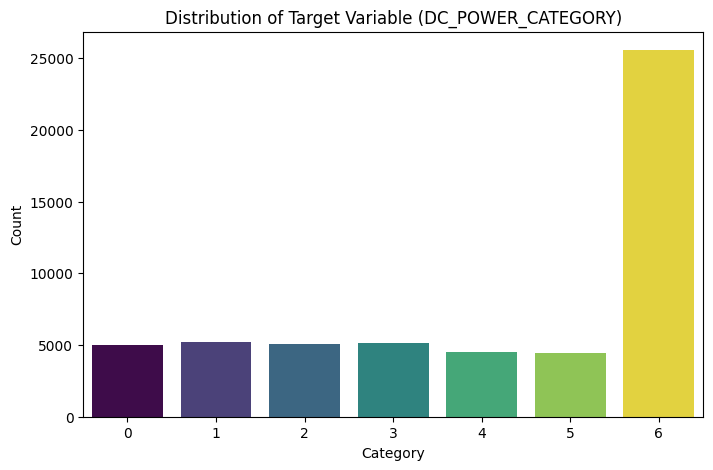

In [3]:
plt.figure(figsize=(8, 5))
sns.countplot(x="DC_POWER_CATEGORY", data=df, hue="DC_POWER_CATEGORY", palette="viridis", legend=False)
plt.title("Distribution of Target Variable (DC_POWER_CATEGORY)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


In [4]:
df["DC_POWER_CATEGORY"].value_counts()

DC_POWER_CATEGORY
6    25568
1     5181
3     5144
2     5103
0     5027
4     4542
5     4457
Name: count, dtype: int64

## Feature Correlation Heatmap

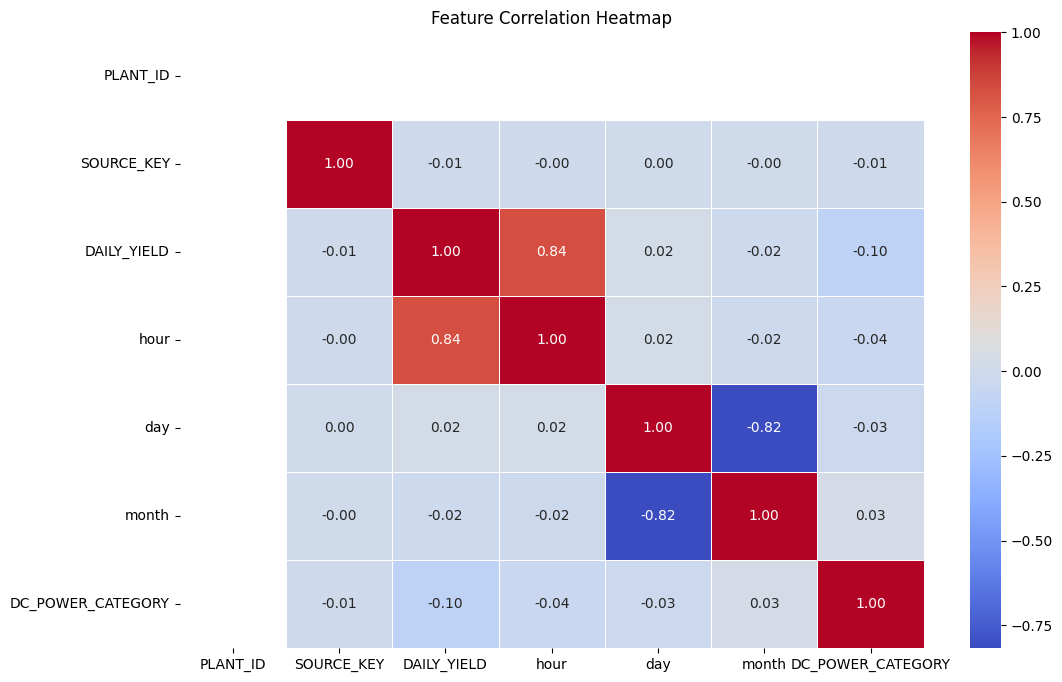

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

##Distribution of numerical features


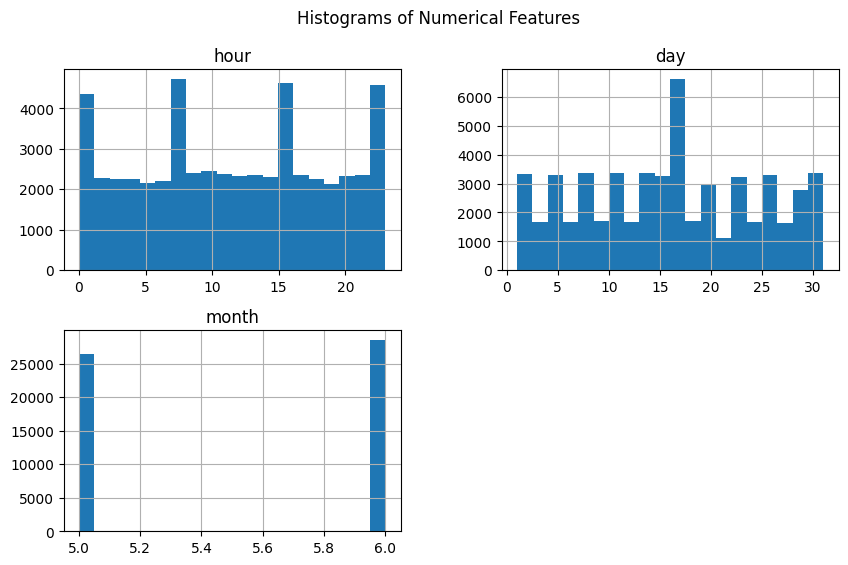

In [6]:
num_features = ["hour", "day", "month"]
df[num_features].hist(figsize=(10,6), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()


## Feature relationships


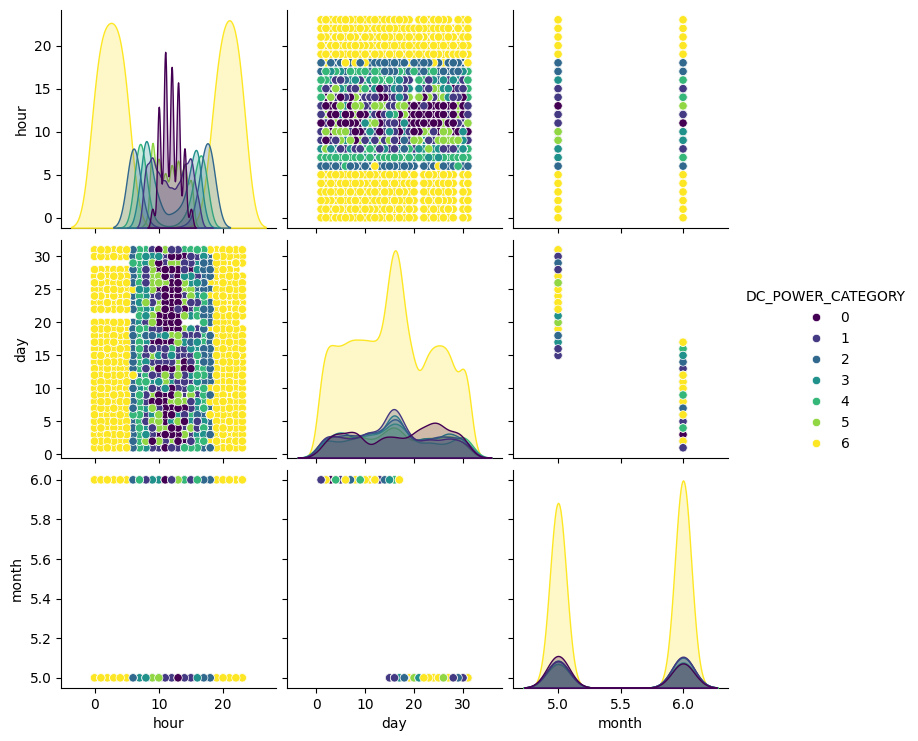

In [7]:
sns.pairplot(df, vars=["hour", "day", "month"], hue="DC_POWER_CATEGORY", palette="viridis")
plt.show()

## Submission

The goal of this RAMP is to classify solar energy output into seven distinct categories. In your code, you will have access to both static numerical features and time-series sensor data. Several example solutions are provided on the submission platform as starting points. A baseline predictive model was established using a Decision Tree Classifier pipeline, incorporating median imputation and feature scaling. This baseline model was evaluated through cross-validation to estimate its generalization performance.

In [8]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42, stratify=y)

# Define baseline model
pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    DecisionTreeClassifier(max_depth=5, random_state=42)
)

# Evaluate the model
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation Accuracy Scores: [0.65958655 0.66401636 0.65966148 0.66125185 0.66238782]
Mean CV Accuracy: 0.6613808110210663


In [9]:
from sklearn.metrics import classification_report

# Train the model
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1006
           1       0.24      1.00      0.39      1036
           2       0.83      0.73      0.78      1021
           3       0.00      0.00      0.00      1029
           4       0.63      0.63      0.63       908
           5       0.00      0.00      0.00       891
           6       1.00      0.96      0.98      5114

    accuracy                           0.66     11005
   macro avg       0.38      0.47      0.40     11005
weighted avg       0.62      0.66      0.62     11005

